## US Oil and Gas Production

Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [2]:
file = "U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=',')
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [3]:
gas_df.shape

(121, 20)

In [4]:
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [5]:
gas_df.dtypes[0:2] # Checking the types of the first two columns.

Month    object
U.S.      int64
dtype: object

In [6]:
pd.to_datetime(gas_df['Month'])

0     2008-06-01
1     2008-07-01
2     2008-08-01
3     2008-09-01
4     2008-10-01
         ...    
116   2018-02-01
117   2018-03-01
118   2018-04-01
119   2018-05-01
120   2018-06-01
Name: Month, Length: 121, dtype: datetime64[ns]

In [7]:
gas_df.dtypes[0:2] # Checking the types of the first two columns.

Month    object
U.S.      int64
dtype: object

In [8]:
gas_df.iloc[0]

Month                               2008-06-01
U.S.                                     70626
Alaska                                    8875
Arkansas                                  1196
Kansas                                    1024
Other States                              2995
Federal Offshore--Gulf of Mexico          7339
Wyoming                                   6839
West Virginia                              670
Utah                                      1198
Pennsylvania                               540
Texas                                    21446
Oklahoma                                  5241
Ohio                                       224
North Dakota                               243
New Mexico                                3975
Montana                                    323
Louisiana                                 3989
Colorado                                  3576
California                                 932
Name: 0, dtype: object

In [9]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'])

In [10]:
gas_df['Month']

0     2008-06-01
1     2008-07-01
2     2008-08-01
3     2008-09-01
4     2008-10-01
         ...    
116   2018-02-01
117   2018-03-01
118   2018-04-01
119   2018-05-01
120   2018-06-01
Name: Month, Length: 121, dtype: datetime64[ns]

In [11]:
gas_df.dtypes[0:2] # Checking the types of the first two columns.

Month    datetime64[ns]
U.S.              int64
dtype: object

In [12]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

In [13]:
gas_df['Month'].dt.month.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int64

---

## Yearly Gas production

*How much gas has been produced yearly globally and in every state of the US?*

In [14]:
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Month                             121 non-null    datetime64[ns]
 1   U.S.                              121 non-null    int64         
 2   Alaska                            121 non-null    int64         
 3   Arkansas                          121 non-null    int64         
 4   Kansas                            121 non-null    int64         
 5   Other States                      121 non-null    int64         
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64         
 7   Wyoming                           121 non-null    int64         
 8   West Virginia                     121 non-null    int64         
 9   Utah                              121 non-null    int64         
 10  Pennsylvania                      121 non-null    

In [15]:
gas_df.shape

(121, 20)

In [16]:
gas_df.head(10)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881
3,2008-09-01,63984,9221,1316,1032,2953,2100,6447,657,1276,542,20435,5224,224,260,4069,330,2960,4049,890
4,2008-10-01,69464,9674,1375,1026,3113,4368,6909,692,1241,543,21948,5126,236,267,4168,330,3718,3860,870
5,2008-11-01,71662,9876,1422,1092,3311,5297,7126,681,1275,524,22218,5145,245,269,4078,326,3916,3978,882
6,2008-12-01,71840,9972,1517,988,3064,5672,7297,657,1259,569,22112,5318,248,242,3957,302,3802,3998,866
7,2009-01-01,72643,9533,1605,1009,3006,6351,7067,679,1273,783,22211,5322,254,241,3968,304,3829,4330,876
8,2009-02-01,74077,10007,1627,1018,3280,6635,7220,695,1289,832,22025,5433,251,243,4063,311,3925,4353,871
9,2009-03-01,72983,9594,1679,994,2901,6726,7135,712,1300,758,22007,5262,245,245,4018,305,3941,4298,864


In [17]:
year = gas_df.groupby(gas_df['Month'].dt.year).sum()

In [18]:
year

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


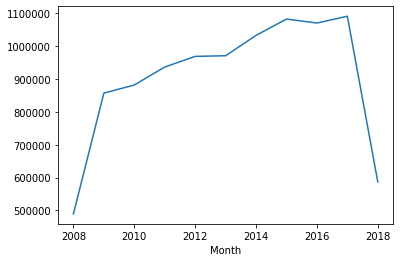

In [19]:
year["U.S."].plot()

Text(0.5, 0, 'Year')

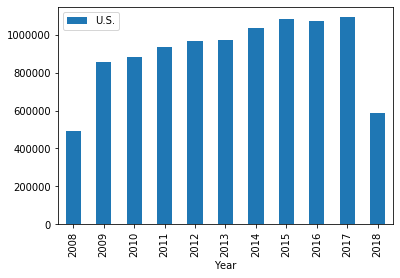

In [20]:
plot = year.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year")

In [21]:
gas_df.count()

Month                               121
U.S.                                121
Alaska                              121
Arkansas                            121
Kansas                              121
Other States                        121
Federal Offshore--Gulf of Mexico    121
Wyoming                             121
West Virginia                       121
Utah                                121
Pennsylvania                        121
Texas                               121
Oklahoma                            121
Ohio                                121
North Dakota                        121
New Mexico                          121
Montana                             121
Louisiana                           121
Colorado                            121
California                          121
dtype: int64

**Discarding rows with Boolean Indexing**
In the previous section, we’ve seen that the production data are not complete for the year 2008 and 2018 (we only have half of the year). We’d like to continue working with full years, meaning we need to discard the first and last rows of year df based on the year.

In [22]:
year_range = np.logical_and(year.index >= 2009,year.index <= 2017)

In [23]:
year_range

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [24]:
year[year_range]

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723
2017,1090730,106969,23050,7247,17069,35592,56410,52609,10312,179644,260314,82616,58702,22577,43910,1577,69947,55546,6642


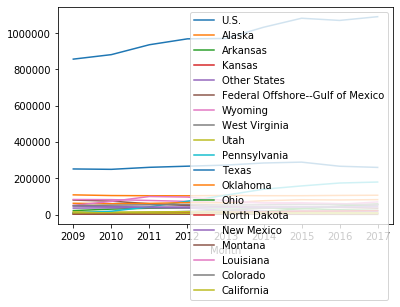

In [25]:
year[year_range].plot()

Text(0.5, 0, 'Year')

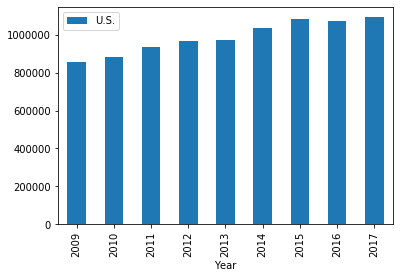

In [26]:
plot2 = year[year_range].filter(items=['U.S.']).plot(kind="bar")
plot2.set_xlabel("Year")

---

## Comparing with Crude Oil Production


In [27]:
oil_file = "U.S._crude_oil_production.csv"
oil_df = pd.read_csv(oil_file, decimal=",")
oil_df.head(3)

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1


In [28]:
pd.to_datetime(oil_df['Month'])

0     2008-06-01
1     2008-07-01
2     2008-08-01
3     2008-09-01
4     2008-10-01
         ...    
116   2018-02-01
117   2018-03-01
118   2018-04-01
119   2018-05-01
120   2018-06-01
Name: Month, Length: 121, dtype: datetime64[ns]

In [29]:
oil_df['Month'] = pd.to_datetime(oil_df['Month'])

In [30]:
oil_df

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2018-02-01,10248,17,513,14,0,463,428,1704,14,...,54,527,18,4,223,27,0,100,4015,1
117,2018-03-01,10461,17,512,14,0,462,428,1681,16,...,54,543,18,4,231,29,0,104,4185,1
118,2018-04-01,10475,17,497,14,0,465,447,1583,16,...,54,531,19,4,232,29,0,103,4222,1
119,2018-05-01,10443,16,496,14,0,464,447,1504,15,...,58,529,19,3,228,29,0,97,4245,1


In [31]:
year

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


In [32]:
type(year)

pandas.core.frame.DataFrame

In [33]:
year_gas = year

In [34]:
oil_df

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2018-02-01,10248,17,513,14,0,463,428,1704,14,...,54,527,18,4,223,27,0,100,4015,1
117,2018-03-01,10461,17,512,14,0,462,428,1681,16,...,54,543,18,4,231,29,0,104,4185,1
118,2018-04-01,10475,17,497,14,0,465,447,1583,16,...,54,531,19,4,232,29,0,103,4222,1
119,2018-05-01,10443,16,496,14,0,464,447,1504,15,...,58,529,19,3,228,29,0,97,4245,1


In [35]:
year_oil = oil_df.groupby(oil_df['Month'].dt.year).sum().filter(items=["U.S. Crude Oil "])

In [36]:
year_oil.columns = ['Crude Oil']

In [37]:
year_oil.head()

,Crude Oil
Month,
2008,34211
2009,64180
2010,65741
2011,67829
2012,78007


In [38]:
year_gas = year_gas.filter(items=["U.S."])

In [39]:
year_gas.columns = ['Gas']
year_gas

,Gas
Month,
2008,489473
2009,856876
2010,881622
2011,936163
2012,968632
2013,970617
2014,1032439
2015,1082158
2016,1070085


In [40]:
year_merged = pd.concat([year_gas,year_oil],axis='columns')

In [41]:
year_merged

,Gas,Crude Oil
Month,,
2008,489473,34211
2009,856876,64180
2010,881622,65741
2011,936163,67829
2012,968632,78007
2013,970617,89585
2014,1032439,105064
2015,1082158,113179
2016,1070085,105970


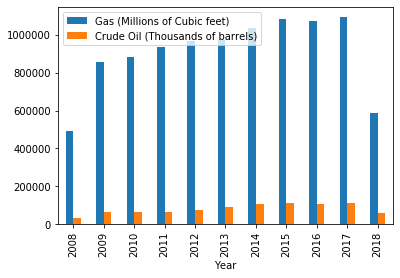

In [42]:
plot = year_merged.plot(kind="bar")
plot.set_xlabel("Year")
plot.legend(['Gas (Millions of Cubic feet)', 'Crude Oil (Thousands of barrels)'])

### State production

Let's have a look at the yearly production of some specific states

In [45]:
year_gas.columns[1:].sort_values()

Index([], dtype='object')

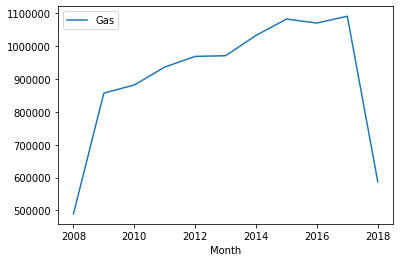

In [46]:
year_gas.plot()

In [50]:
yearly_gas = gas_df.groupby(gas_df['Month'].dt.year).sum()
yearly_gas

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


Text(0.5, 0, 'Year')

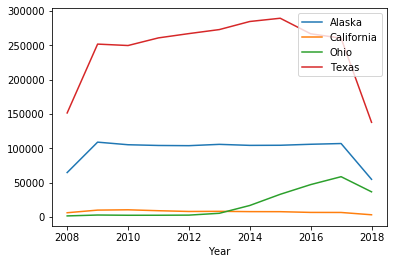

In [54]:
yearly_gas[['Alaska','California','Ohio','Texas']].plot().set_xlabel("Year")